In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,cohen_kappa_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
back_data = pd.read_csv('vJIURh.csv')
back_data.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

In [3]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [4]:
back_data.head()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope    Status  
0         14.5386       15.30468    -28.658501          43.5123  Abnormal  
1         17.5323       16.78486    -25.530607          16.1102  Abnormal  
2         17.4861       16.65897    -29.031888          19.2221  Abnormal  
3         12.7074       11.42447    -30.470246          18.8329  Abnormal  
4         15.9546        8.87237    -16.378376          24.9171  Abnormal

In [5]:
back_data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

- There are no null values in dataset.

In [6]:
back_data.describe().T

count        mean        std        min         25%  \
pelvic_incidence          310.0   60.496653  17.236520  26.147921   46.430294   
pelvic tilt               310.0   17.542822  10.008330  -6.554948   10.667069   
lumbar_lordosis_angle     310.0   51.930930  18.554064  14.000000   37.000000   
sacral_slope              310.0   42.953831  13.423102  13.366931   33.347122   
pelvic_radius             310.0  117.920655  13.317377  70.082575  110.709196   
degree_spondylolisthesis  310.0   26.296694  37.559027 -11.058179    1.603727   
pelvic_slope              310.0    0.472979   0.285787   0.003220    0.224367   
Direct_tilt               310.0   21.321526   8.639423   7.027000   13.054400   
thoracic_slope            310.0   13.064511   3.399713   7.037800   10.417800   
cervical_tilt             310.0   11.933317   2.893265   7.030600    9.541140   
sacrum_angle              310.0  -14.053139  12.225582 -35.287375  -24.289522   
scoliosis_slope           310.0   25.645981  10.450558   7.007900   17.189075   

                                 50%         75%         max  
pelvic_incidence           58.691038   72.877696  129.834041  
pelvic tilt                16.357689   22.120395   49.431864  
lumbar_lordosis_angle      49.562398   63.000000  125.742385  
sacral_slope               42.404912   52.695888  121.429566  
pelvic_radius             118.268178  125.467674  163.071041  
degree_spondylolisthesis   11.767934   41.287352  418.543082  
pelvic_slope                0.475989    0.704846    0.998827  
Direct_tilt                21.907150   28.954075   36.743900  
thoracic_slope             12.938450   15.889525   19.324000  
cervical_tilt              11.953835   14.371810   16.821080  
sacrum_angle              -14.622856   -3.497094    6.972071  
scoliosis_slope            24.931950   33.979600   44.341200

In [7]:
back_data.Status.describe()

count          310
unique           2
top       Abnormal
freq           210
Name: Status, dtype: object

Abnormal    210
Normal      100
Name: Status, dtype: int64


<Axes: >

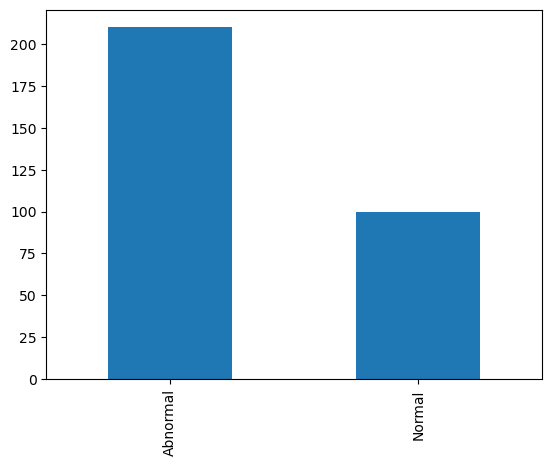

In [8]:
a=back_data.Status.value_counts()
print(a)
a.plot(kind='bar')

## Multicollinearity Check

- checking if individual columns have corr.
- checking corr matrix

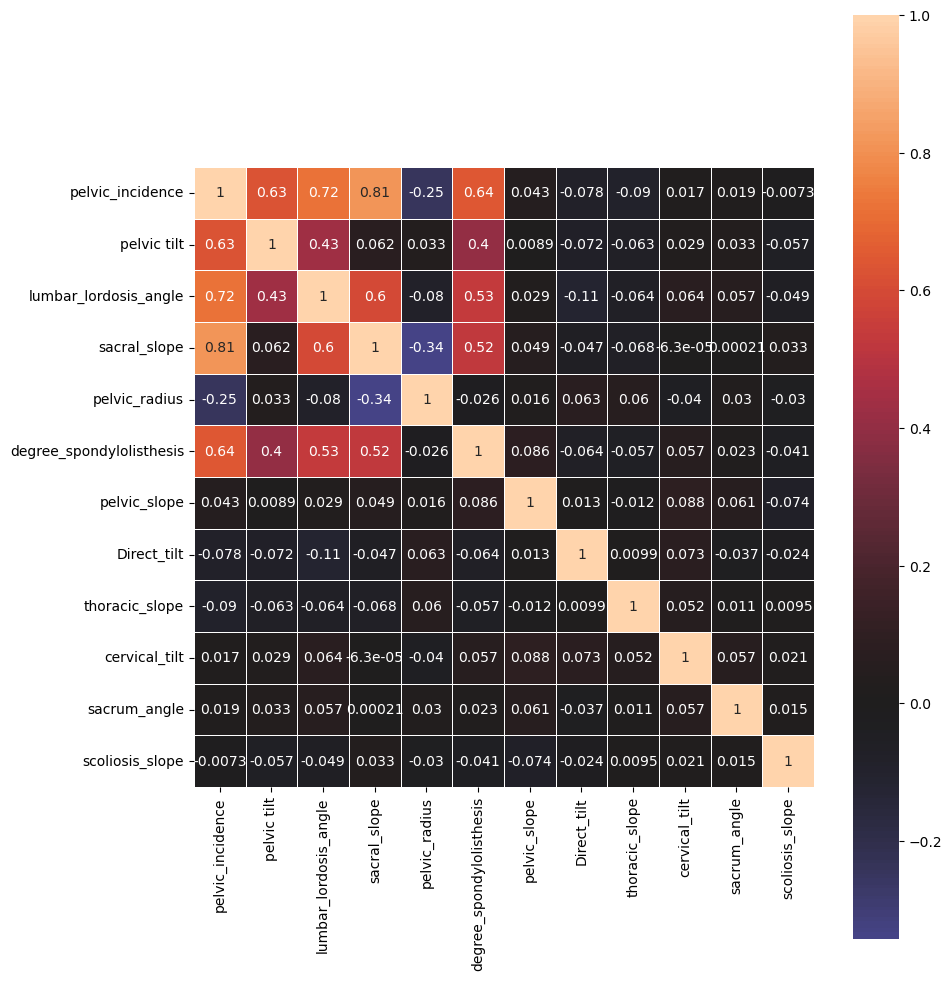

In [9]:
plt.figure(figsize=(10,12))
sns.heatmap(back_data.corr(),annot=True, center=0, square=True, linewidths=.5)
plt.show()

- Pelvic_incidence has higher corr with pelvic tilt, lumbar lordosis angle, sacral slope and degree of splondylolisthesis.

## Bivariate analysis.

In [10]:
back_data.groupby('Status').mean()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
Status                                                                         
Abnormal         64.692562    19.791111              55.925370      44.90145   
Normal           51.685244    12.821414              43.542605      38.86383   

          pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
Status                                                                         
Abnormal     115.077713                 37.777705      0.483979    21.085875   
Normal       123.890834                  2.186572      0.449880    21.816394   

          thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
Status                                                                  
Abnormal       12.948913      12.132737    -13.826677        25.146915  
Normal         13.307268      11.514534    -14.528712        26.694019

- degree_spondylolisthesis is having very clear distinct mean value for normal and abnormal back pain.

In [11]:
back_data.groupby('Status').median()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
Status                                                                         
Abnormal         65.274888    18.798899              56.150000     44.639597   
Normal           50.123115    13.482435              42.638923     37.059694   

          pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
Status                                                                         
Abnormal     115.650323                 31.946516      0.501280      21.7506   
Normal       123.874328                  1.152710      0.418732      22.4146   

          thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
Status                                                                  
Abnormal        12.77005      11.973735    -14.892070         24.50940  
Normal          13.40975      11.330750    -13.974694         27.72795

- degree_spondylolisthesis is having very clear distinct median value for normal and abnormal back pain.
- mean and median values of features differ for pelvic_incidence	pelvic tilt	lumbar_lordosis_angle	sacral_slope	pelvic_radius	degree_spondylolisthesi
- This indicates that back pain can be classified using these features.

### Box Plots

In [12]:
back_data.select_dtypes(exclude=object)

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0        98.672917                 -0.254400      0.744503      12.5661   
1       114.405425                  4.564259      0.415186      12.8874   
2       105.985135                 -3.530317      0.474889      26.8343   
3       101.868495                 11.211523      0.369345      23.5603   
4       108.168725                  7.918501      0.543360      35.4940   
..             ...                       ...           ...          ...   
305     117.449062                 -4.245395      0.129744       7.8433   
306     114.365845                 -0.421010      0.047913      19.1986   
307     125.670725                 -2.707880      0.081070      16.2059   
308     118.545842                  0.214750      0.159251      14.7334   
309     123.945244                 -0.199249      0.674504      19.3825   

     thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0           14.5386       15.30468    -28.658501          43.5123  
1           17.5323       16.78486    -25.530607          16.1102  
2           17.4861       16.65897    -29.031888          19.2221  
3           12.7074       11.42447    -30.470246          18.8329  
4           15.9546        8.87237    -16.378376          24.9171  
..              ...            ...           ...              ...  
305         14.7484        8.51707    -15.728927          11.5472  
306         18.1972        7.08745      6.013843          43.8693  
307         13.5565        8.89572      3.564463          18.4151  
308         16.0928        9.75922      5.767308          33.7192  
309         17.6963       13.72929      1.783007          40.6049  

[310 rows x 12 columns]

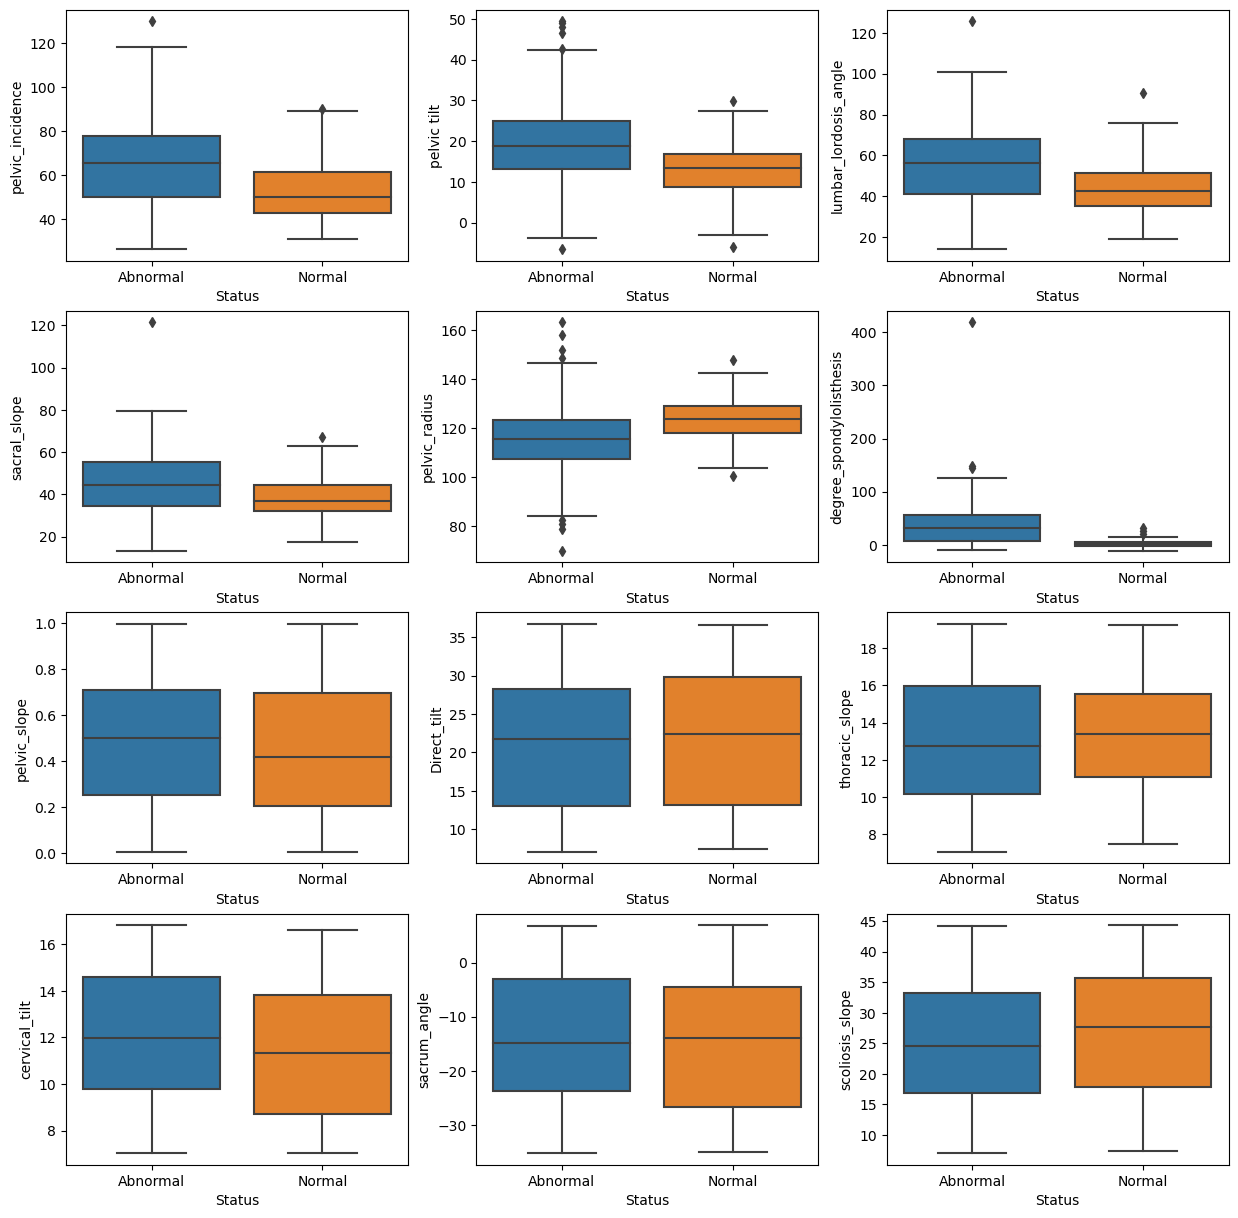

In [13]:
d=back_data.select_dtypes(exclude=object)
fig,ax = plt.subplots(4,3,figsize=(15,15))
for col, ax in zip (d.columns, ax.flatten()):
    sns.boxplot(x=back_data['Status'],y=d[col], ax=ax)
    

#### Inference
- pelvic slope, direct tilt, thoracic slope, cervical tilt, sacrum angle, scoliosis slope do not have much diff in distribution with respect to normal and abnormal back pain.
- Outliers detection
- for features pelvic - incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and degree spondelithiasis has outliers.
- these values are important for back pain status. we will not remove outliers at this level.

## Pairplot

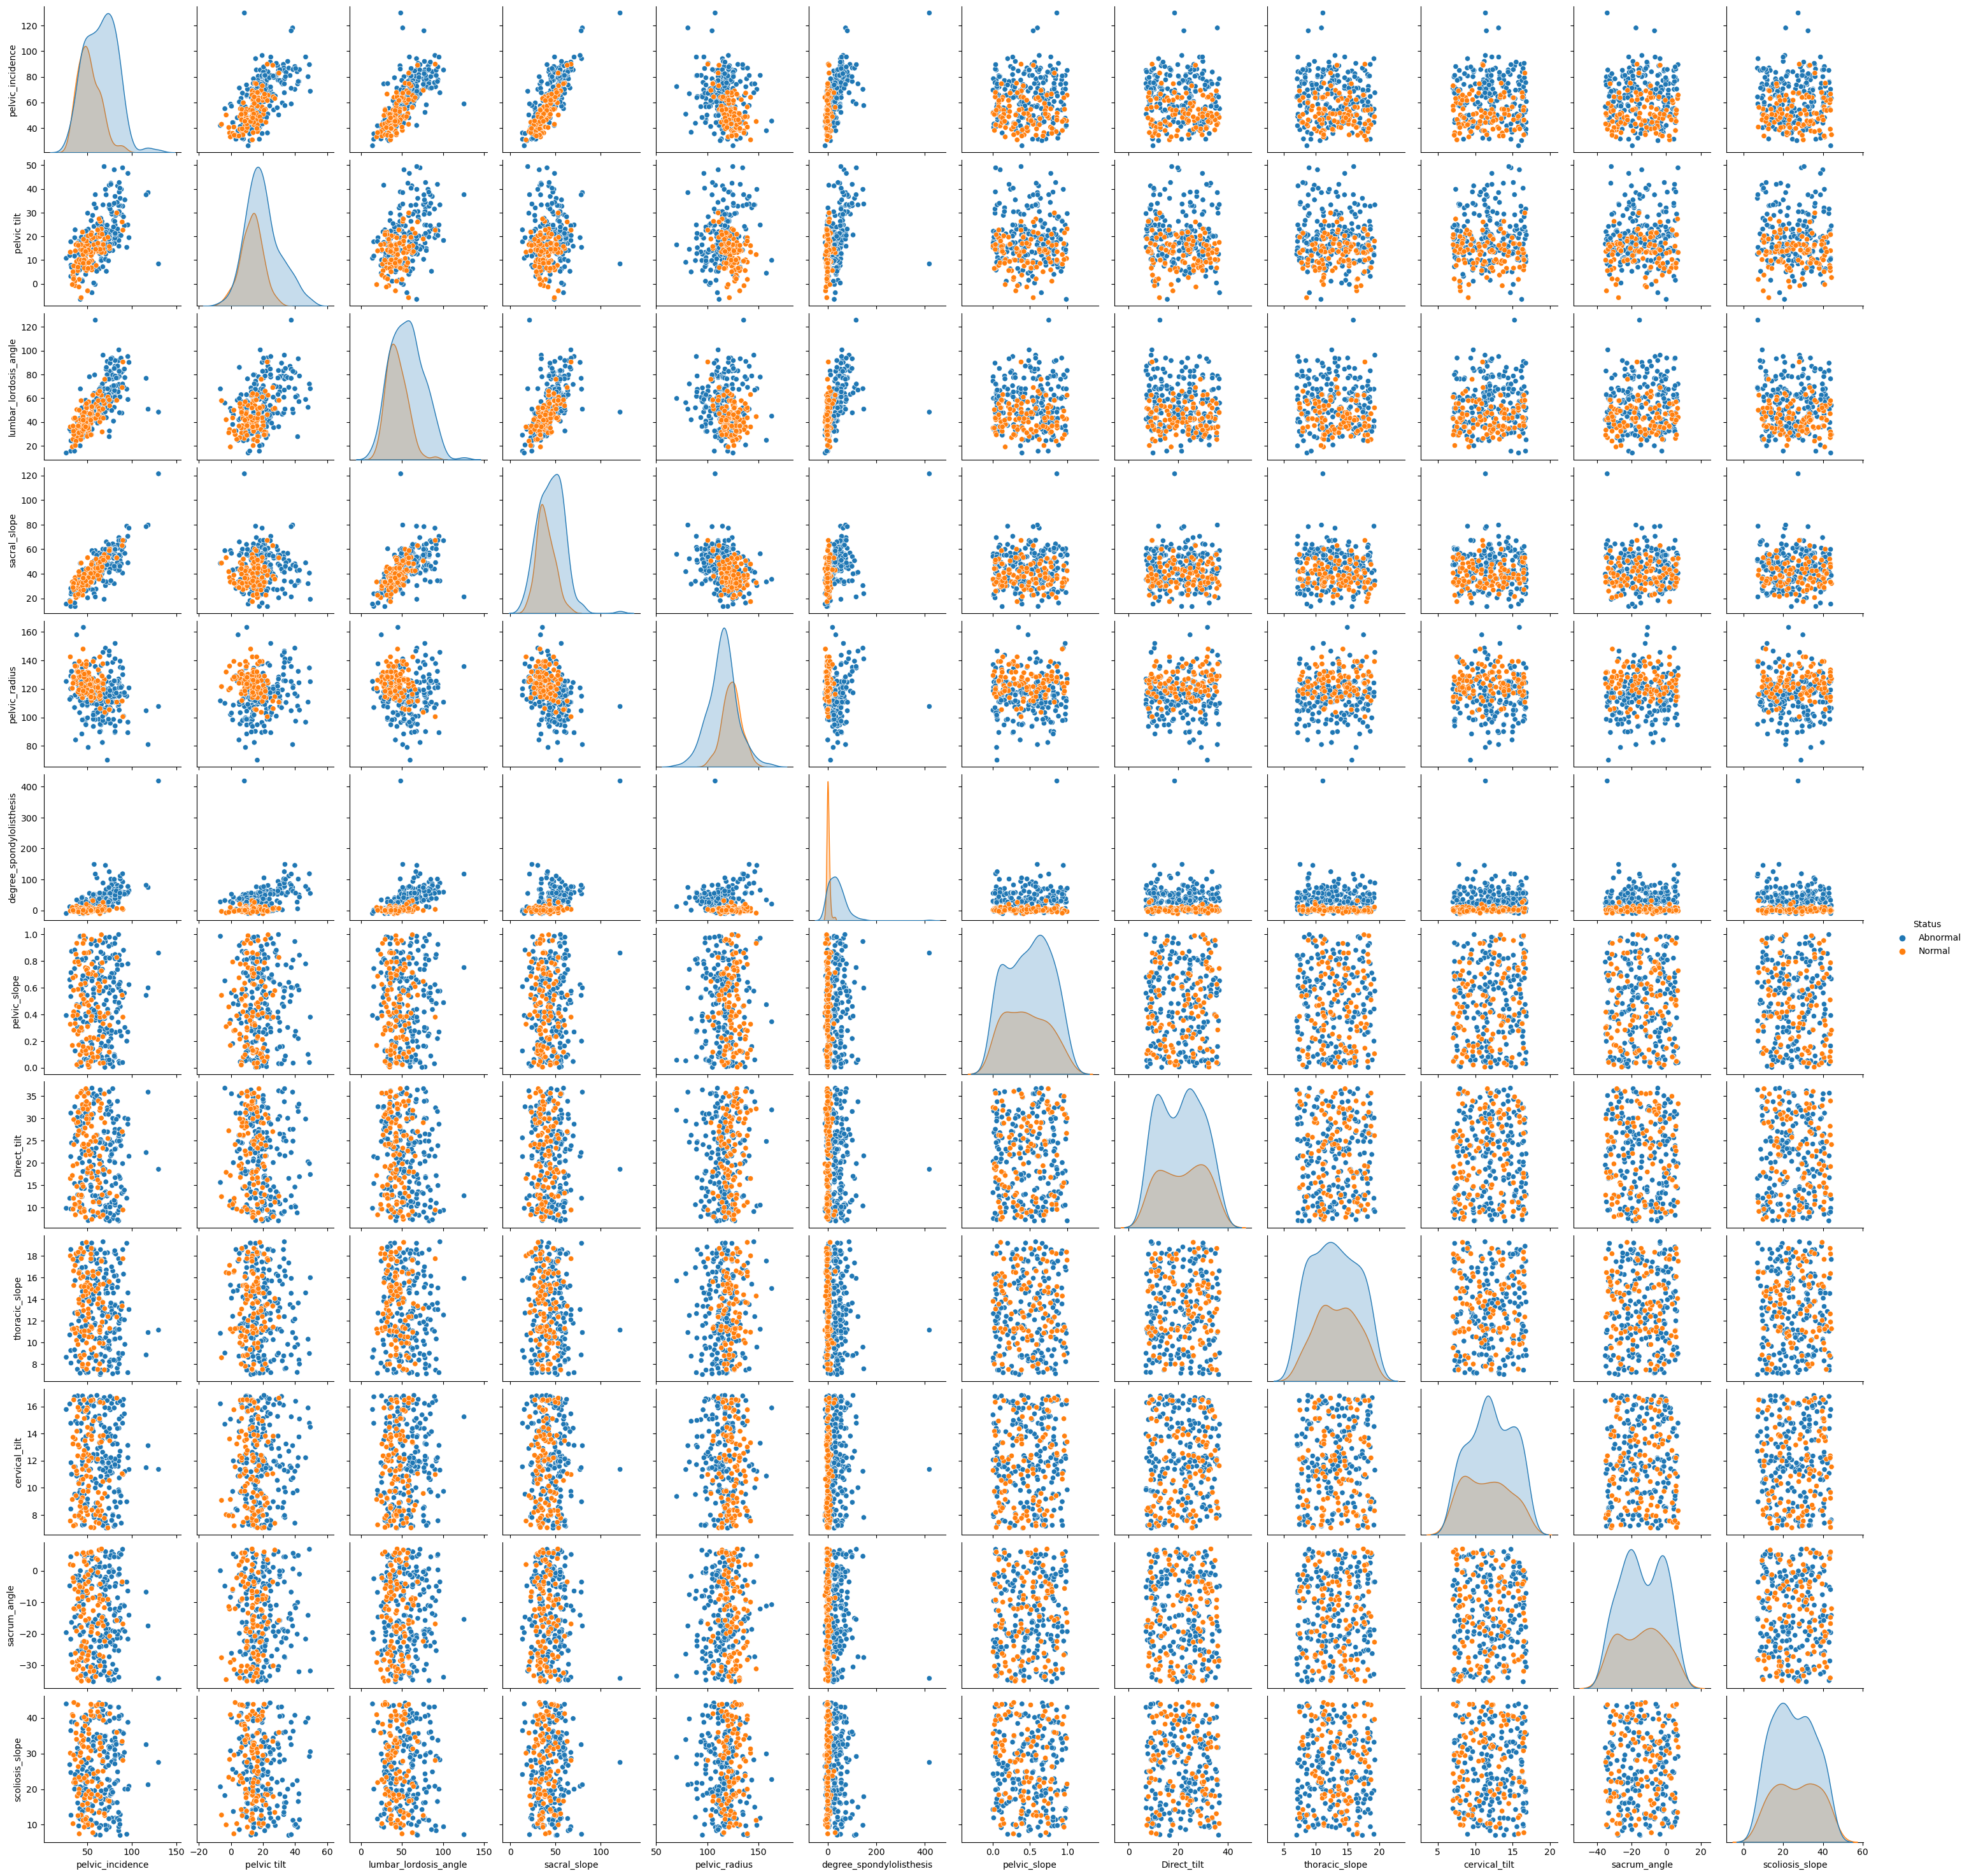

In [14]:
sns.pairplot(back_data, hue='Status')

### Inferences
- there are features like 'pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle','sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'have well separation of distribution with the target variable - status of back pain.

In [15]:
back_data.loc[back_data.Status=='Abnormal','Status']=1
back_data.loc[back_data.Status=='Normal','Status']=0

In [16]:
X = back_data.drop('Status',axis=1)
y= back_data['Status']

In [17]:
back_data.head()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope Status  
0         14.5386       15.30468    -28.658501          43.5123      1  
1         17.5323       16.78486    -25.530607          16.1102      1  
2         17.4861       16.65897    -29.031888          19.2221      1  
3         12.7074       11.42447    -30.470246          18.8329      1  
4         15.9546        8.87237    -16.378376          24.9171      1

In [18]:
y.dtype

dtype('O')

In [19]:
y= y.astype('int')

In [20]:
def data_preprocess(X, y):
    ss = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    train_scaled = ss.fit_transform(X_train)
    test_scaled = ss.transform(X_test)
    train_scaled = pd.DataFrame(train_scaled, columns=X.columns).reset_index(drop=True)
    test_scaled = pd.DataFrame(test_scaled, columns=X.columns).reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return train_scaled, test_scaled, y_train, y_test

In [21]:
def performance(X,y,model):
    y_pred = model.predict(X)
    ypred_prob = model.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True)
    print(classification_report(y,y_pred))
    print('AUC Score:', roc_auc_score(y,ypred_prob))

In [22]:
def roc_plot(model,X,y,label):
    ypred_prob = model.predict_proba(X)[:,1]
    auc_score = roc_auc_score(y,ypred_prob)
    fpr,tpr,thresh = roc_curve(y,ypred_prob)
    
    plt.plot(fpr,tpr,label = label+'(AUC Score: %0.4f)'%auc_score)
    # plt.plot(fpr,tpr,label = label+'AUC Score='+str(auc_score))
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    plt.plot([0,1],[0,1],'r--')
    
    plt.title('ROC Plot')
    plt.xlabel('FPR (1-Specificity)')
    plt.ylabel('TPR (Sensitivity)')
    
    plt.legend(loc='lower right')
    plt.grid(True)

### Model building

In [23]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

log_result = LogisticRegression()
log_result.fit(X_train,y_train)

LogisticRegression()

Training Performance
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        66
           1       0.89      0.89      0.89       151

    accuracy                           0.85       217
   macro avg       0.82      0.82      0.82       217
weighted avg       0.85      0.85      0.85       217

AUC Score: 0.92544651816175


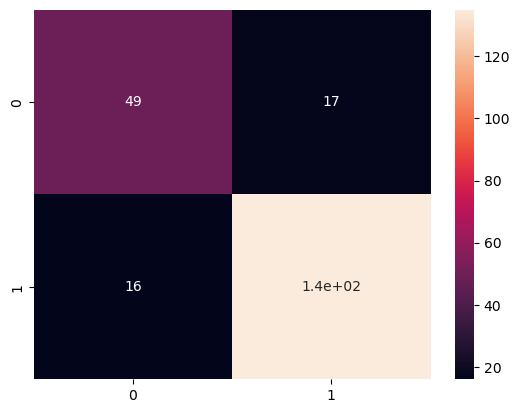

In [24]:
print('Training Performance')
performance(X_train,y_train,log_result)

Testing Performance
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        34
           1       0.86      0.95      0.90        59

    accuracy                           0.87        93
   macro avg       0.88      0.84      0.85        93
weighted avg       0.87      0.87      0.87        93

AUC Score: 0.9571286141575275


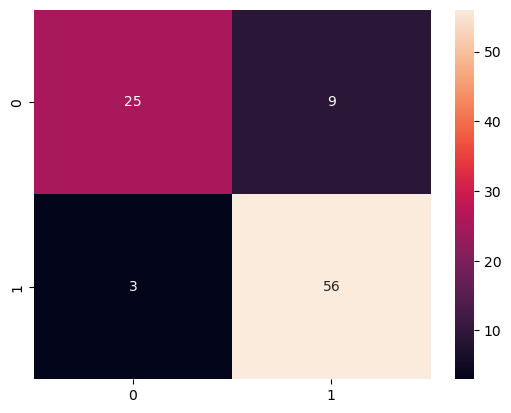

In [25]:
print('Testing Performance')
performance(X_test,y_test,log_result)

- We can see that testing performance is slightly higher than training. the model has variance.

In [26]:
model_list =['Base LR']
performance_list = [0.87]

In [27]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocess(X,y)
X_train_scaled.head()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0          1.340351     1.357938               0.421664      0.762355   
1          0.858734    -0.132479               0.442635      1.193779   
2          1.459814     1.686850               0.570340      0.684035   
3         -0.887844    -0.467626              -0.840510     -0.808848   
4         -0.576728    -0.414721              -1.111970     -0.447342   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      -0.626552                 -0.483661      1.264095    -0.963312   
1      -1.053323                 -0.621532     -1.251693    -0.327344   
2       0.579208                  1.233509      0.458925     0.550529   
3       0.454709                 -0.500354      0.685637    -1.317637   
4      -0.792747                 -0.833499      0.770643     1.212121   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0       -0.189908       1.582141     -0.154616         0.964962  
1        0.753598      -0.442500     -1.491940        -0.870929  
2        1.369237      -1.329332      1.459639        -1.171392  
3        1.781931      -1.539045     -1.523853        -0.590969  
4        1.010131       1.101619      1.064517        -0.707434

In [28]:
scaled_log = LogisticRegression()
scaled_log.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        76
           1       0.89      0.88      0.88       141

    accuracy                           0.85       217
   macro avg       0.83      0.83      0.83       217
weighted avg       0.85      0.85      0.85       217

AUC Score: 0.9345837999253452


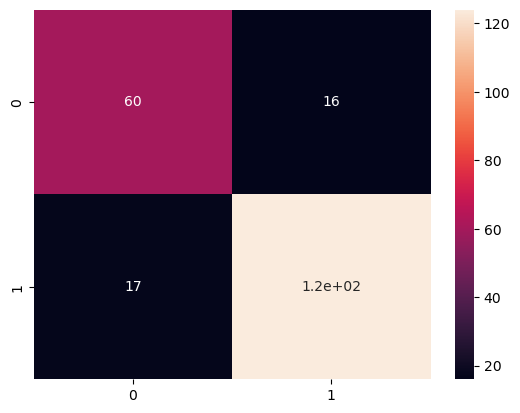

In [29]:
performance(X_train_scaled,y_train,scaled_log)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.94      0.93      0.93        69

    accuracy                           0.90        93
   macro avg       0.87      0.88      0.88        93
weighted avg       0.90      0.90      0.90        93

AUC Score: 0.9498792270531401


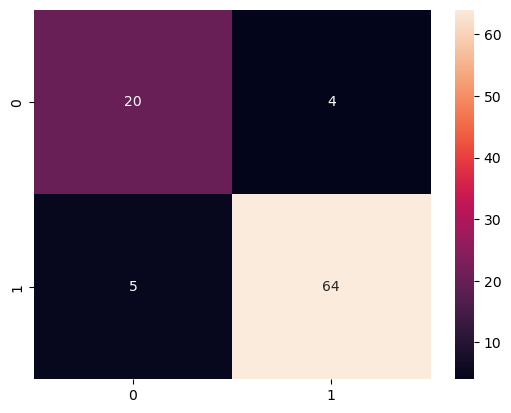

In [30]:
performance(X_test_scaled,y_test,scaled_log)

In [31]:
scaled_log.coef_

array([[-0.11330208,  0.77477362, -0.10962714, -0.69034753, -0.87094584,
         3.65556506,  0.09460675, -0.00417941, -0.07489513,  0.18476247,
        -0.09277192, -0.01762674]])

In [32]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_const).fit()
logit_model.summary()

         Current function value: 0.306377
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           12
Date:                Thu, 11 Jan 2024   Pseudo R-squ.:                  0.5269
Time:                        13:29:26   Log-Likelihood:                -66.484
converged:                      False   LL-Null:                       -140.53
Covariance Type:            nonrobust   LLR p-value:                 1.386e-25
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.7987      0.514      5.449      0.000       1.792       3.805
pelvic_incidence             0.7232   1.83e+07   3.95e-08      1.000   -3.59e+07    3.59e+07
pelvic tilt                  0.5648   1.01e+07   5.61e-08      1.000   -1.97e+07    1.97e+07
lumbar_lordosis_angle       -0.3740      0.497     -0.752      0.452      -1.349       0.601
sacral_slope                -1.7751   1.43e+07  -1.24e-07      1.000    -2.8e+07     2.8e+07
pelvic_radius               -1.1033      0.327     -3.377      0.001      -1.744      -0.463
degree_spondylolisthesis     6.3731      1.050      6.069      0.000       4.315       8.431
pelvic_slope                 0.0594      0.223      0.266      0.790      -0.378       0.497
Direct_tilt                  0.0476      0.232      0.205      0.837      -0.407       0.502
thoracic_slope              -0.1672      0.228     -0.733      0.463      -0.614       0.280
cervical_tilt                0.2169      0.227      0.956      0.339      -0.228       0.662
sacrum_angle                -0.1078      0.227     -0.474      0.635      -0.553       0.338
scoliosis_slope             -0.0178      0.221     -0.081      0.936      -0.450       0.415
============================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- log of odds of back pain increases by 0.72 per unit increase in pelvic_incidence.
- odds of back pain change in the multiple of e^0.56 for pelvic tree.

#### Inference
- The above model did not converge well. multicollinearity issue.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Vif Factor"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif["features"] = X_train_const.columns
vif

Vif Factor                  features
0     1.000000                     const
1          inf          pelvic_incidence
2          inf               pelvic tilt
3     2.289240     lumbar_lordosis_angle
4          inf              sacral_slope
5     1.304247             pelvic_radius
6     1.820336  degree_spondylolisthesis
7     1.041194              pelvic_slope
8     1.082305               Direct_tilt
9     1.029902            thoracic_slope
10    1.056274             cervical_tilt
11    1.026062              sacrum_angle
12    1.042122           scoliosis_slope

In [34]:
X_train_const.drop('lumbar_lordosis_angle',axis=1,inplace=True)

In [35]:
vif = pd.DataFrame()
vif["Vif Factor"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

Vif Factor                  features
0     1.000000          pelvic_incidence
1          inf               pelvic tilt
2          inf     lumbar_lordosis_angle
3          inf              sacral_slope
4     1.196688             pelvic_radius
5     1.817754  degree_spondylolisthesis
6     1.041038              pelvic_slope
7     1.041566               Direct_tilt
8     1.027188            thoracic_slope
9     1.050916             cervical_tilt
10    1.024620              sacrum_angle
11    1.042111           scoliosis_slope

In [36]:
X_train_const.drop('pelvic tilt',axis=1,inplace=True)

In [37]:
vif = pd.DataFrame()
vif["Vif Factor"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif["features"] = X_train_const.columns
vif

Vif Factor                  features
0     1.000000                     const
1     3.909032          pelvic_incidence
2     3.605108              sacral_slope
3     1.196074             pelvic_radius
4     1.812397  degree_spondylolisthesis
5     1.039220              pelvic_slope
6     1.039487               Direct_tilt
7     1.021701            thoracic_slope
8     1.050300             cervical_tilt
9     1.019640              sacrum_angle
10    1.021321           scoliosis_slope

In [38]:
new_sm = sm.Logit(y_train,X_train_const).fit()
new_sm.summary()

Optimization terminated successfully.
         Current function value: 0.307696
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                           10
Date:                Thu, 11 Jan 2024   Pseudo R-squ.:                  0.5249
Time:                        13:29:26   Log-Likelihood:                -66.770
converged:                       True   LL-Null:                       -140.53
Covariance Type:            nonrobust   LLR p-value:                 1.210e-26
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.7772      0.510      5.449      0.000       1.778       3.776
pelvic_incidence             1.5939      0.622      2.562      0.010       0.374       2.813
sacral_slope                -2.7241      0.614     -4.437      0.000      -3.927      -1.521
pelvic_radius               -1.1563      0.319     -3.626      0.000      -1.781      -0.531
degree_spondylolisthesis     6.2300      1.025      6.078      0.000       4.221       8.239
pelvic_slope                 0.0707      0.223      0.317      0.751      -0.366       0.508
Direct_tilt                  0.0559      0.231      0.242      0.809      -0.397       0.509
thoracic_slope              -0.1274      0.220     -0.580      0.562      -0.558       0.303
cervical_tilt                0.2046      0.225      0.907      0.364      -0.237       0.647
sacrum_angle                -0.0893      0.225     -0.397      0.692      -0.530       0.352
scoliosis_slope             -0.0178      0.220     -0.081      0.936      -0.449       0.414
============================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## DT

In [39]:
X = X.drop(['pelvic tilt','sacral_slope'],axis=1)

In [ ]:
X_test_scaled.drop(['pelvic tilt','sacral_slope'],axis=1,inplace=True)

In [48]:
X_train_scaled.drop(['pelvic tilt','sacral_slope'],axis=1,inplace=True)

In [49]:
X_train_scaled.head()

pelvic_incidence  lumbar_lordosis_angle  pelvic_radius  \
0          1.340351               0.421664      -0.626552   
1          0.858734               0.442635      -1.053323   
2          1.459814               0.570340       0.579208   
3         -0.887844              -0.840510       0.454709   
4         -0.576728              -1.111970      -0.792747   

   degree_spondylolisthesis  pelvic_slope  Direct_tilt  thoracic_slope  \
0                 -0.483661      1.264095    -0.963312       -0.189908   
1                 -0.621532     -1.251693    -0.327344        0.753598   
2                  1.233509      0.458925     0.550529        1.369237   
3                 -0.500354      0.685637    -1.317637        1.781931   
4                 -0.833499      0.770643     1.212121        1.010131   

   cervical_tilt  sacrum_angle  scoliosis_slope  
0       1.582141     -0.154616         0.964962  
1      -0.442500     -1.491940        -0.870929  
2      -1.329332      1.459639        -1.171392  
3      -1.539045     -1.523853        -0.590969  
4       1.101619      1.064517        -0.707434

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=3,random_state=10)
DT_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        76
           1       0.94      0.82      0.88       141

    accuracy                           0.85       217
   macro avg       0.83      0.86      0.84       217
weighted avg       0.86      0.85      0.85       217

AUC Score: 0.9208659947741694


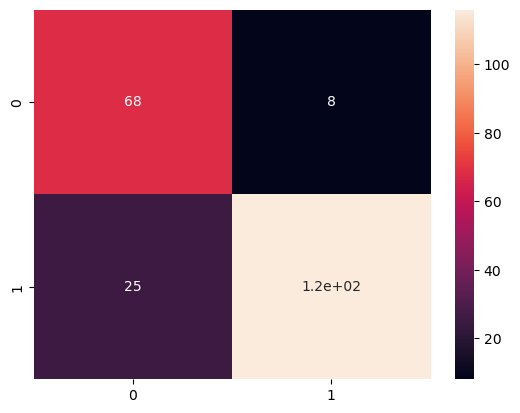

In [51]:
performance(X_train_scaled,y_train,DT_model)

              precision    recall  f1-score   support

           0       0.53      0.79      0.63        24
           1       0.91      0.75      0.83        69

    accuracy                           0.76        93
   macro avg       0.72      0.77      0.73        93
weighted avg       0.81      0.76      0.78        93

AUC Score: 0.8574879227053142


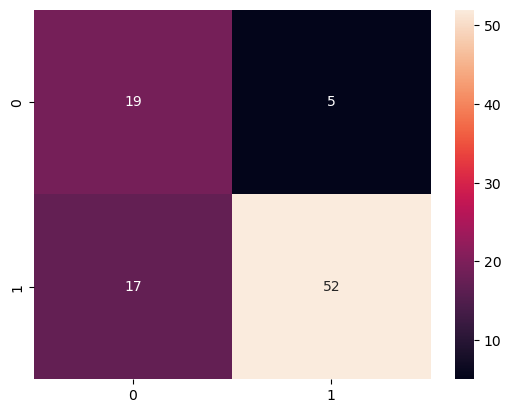

In [52]:
performance(X_test_scaled,y_test,DT_model)

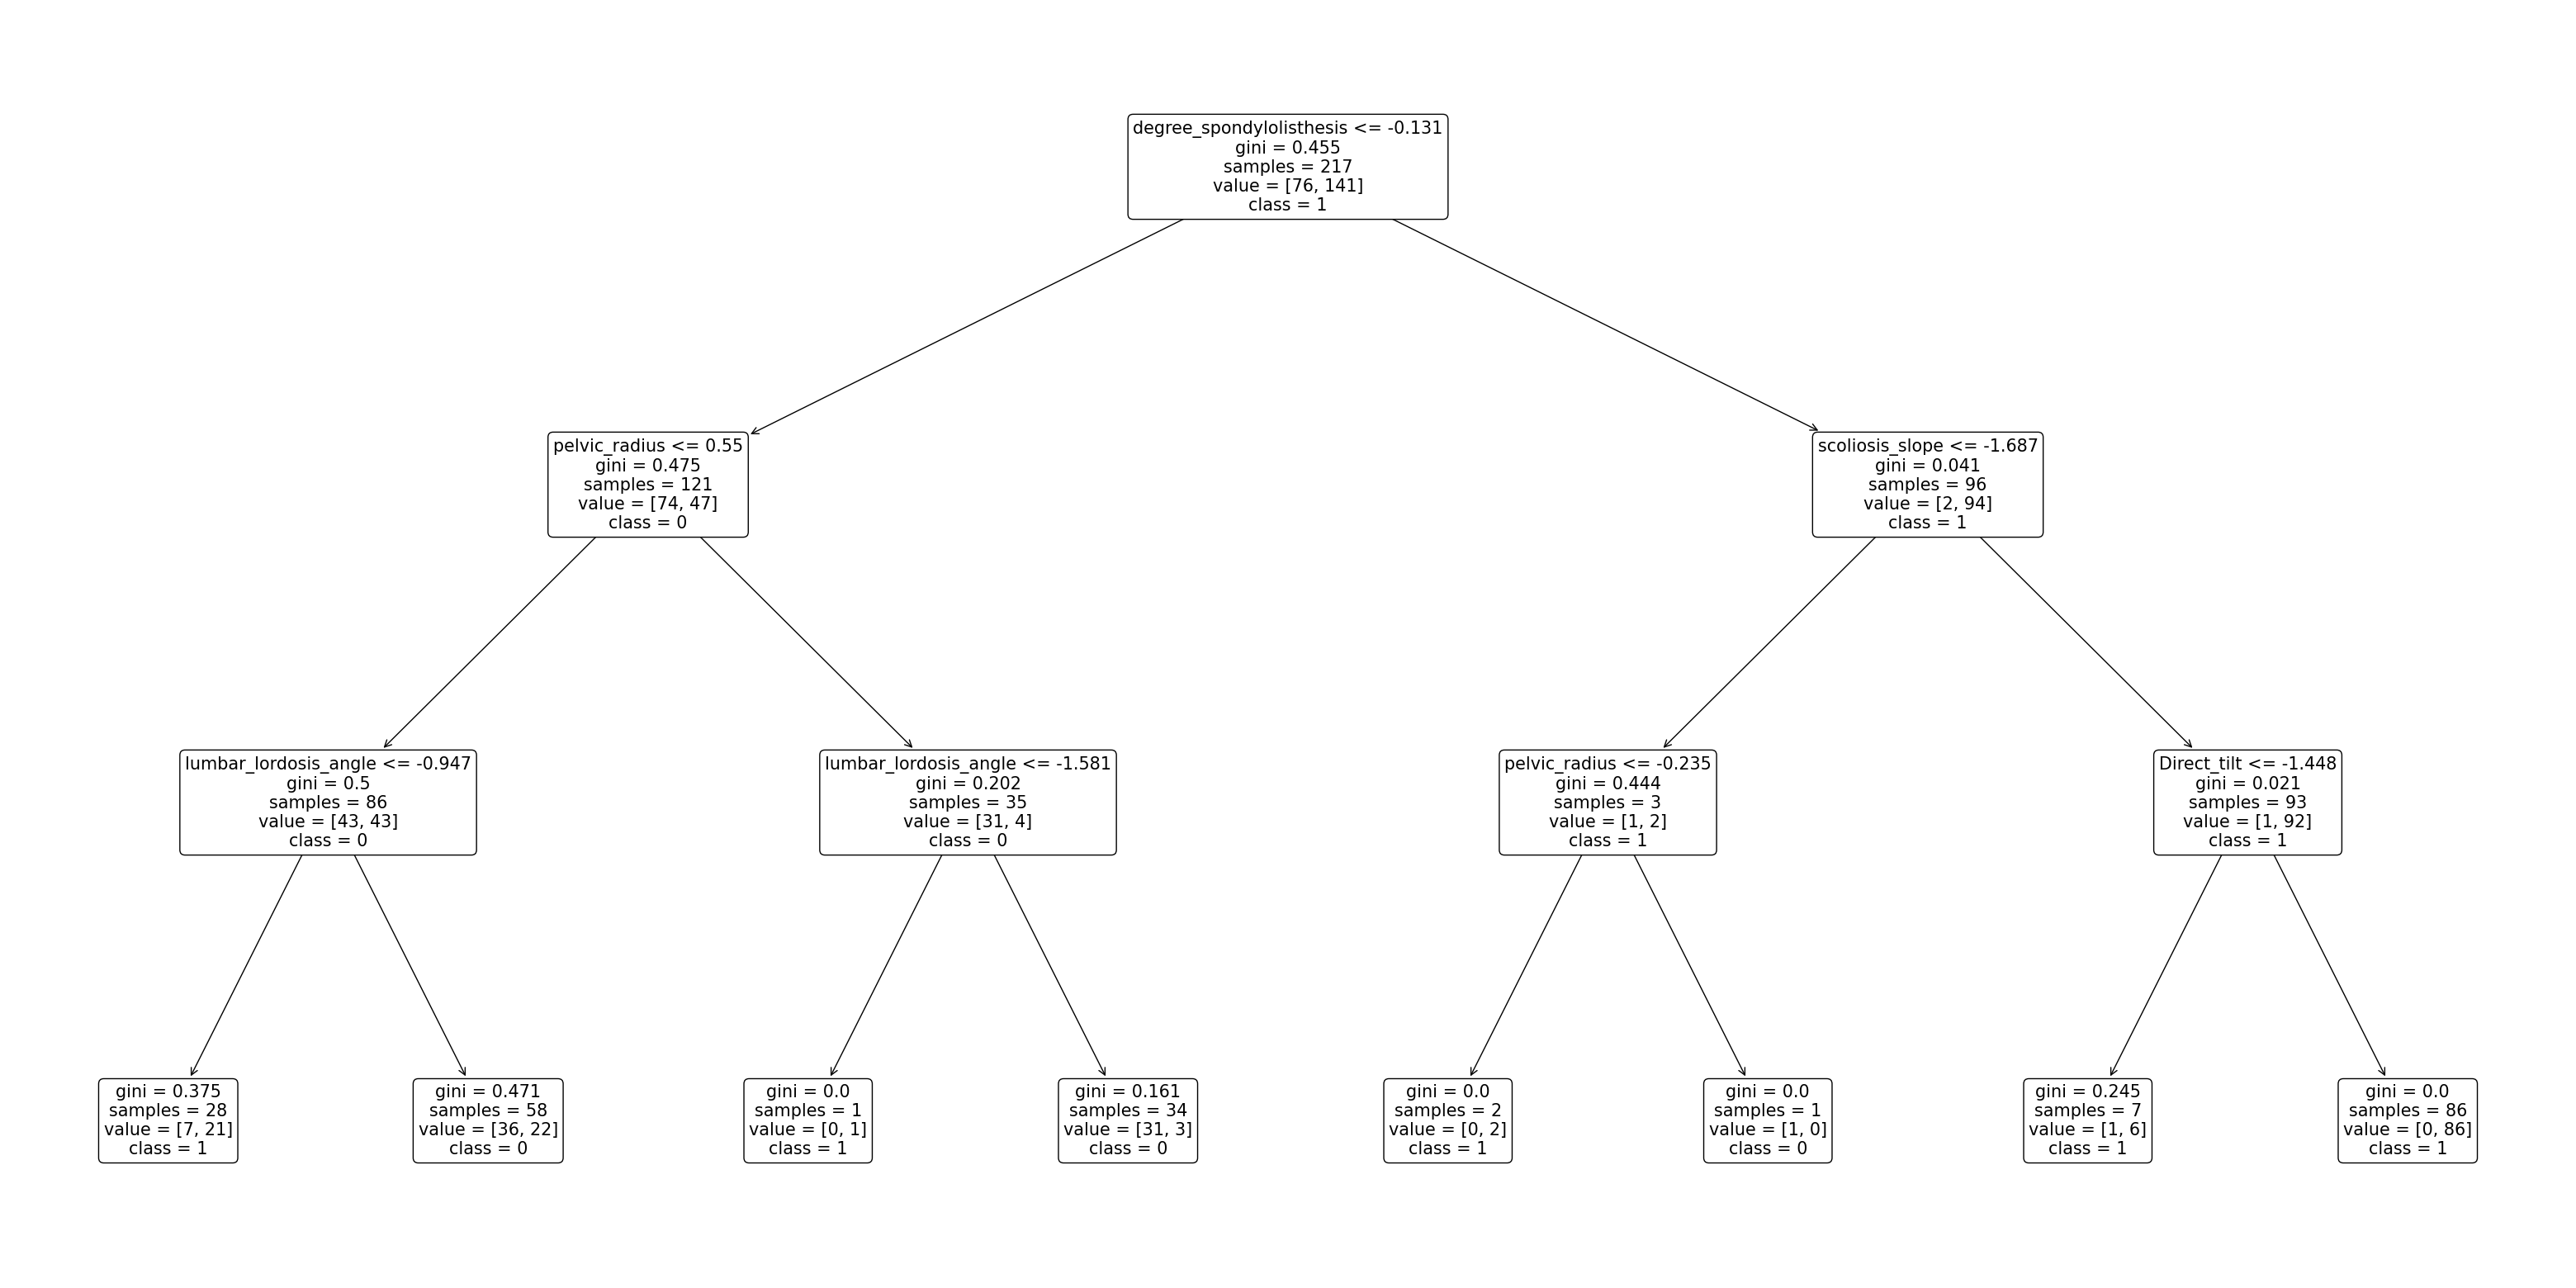

In [53]:
from sklearn import tree
feature_names_list = X_train_scaled.columns.to_list()
plt.figure(figsize=(40,20))
tree.plot_tree(DT_model,feature_names=feature_names_list, rounded=True,class_names=['0','1'])
plt.show()

In [56]:
imp = DT_model.feature_importances_
imp

array([0.        , 0.12655406, 0.16245605, 0.69482751, 0.        ,
       0.00491371, 0.        , 0.        , 0.        , 0.01124868])

In [57]:
df_imp = pd.DataFrame(zip(X_train_scaled.columns,imp),columns=['column','importance'])
df_imp = df_imp.sort_values('importance',ascending=False)
df_imp

column  importance
3  degree_spondylolisthesis    0.694828
2             pelvic_radius    0.162456
1     lumbar_lordosis_angle    0.126554
9           scoliosis_slope    0.011249
5               Direct_tilt    0.004914
0          pelvic_incidence    0.000000
4              pelvic_slope    0.000000
6            thoracic_slope    0.000000
7             cervical_tilt    0.000000
8              sacrum_angle    0.000000

<Axes: xlabel='importance', ylabel='column'>

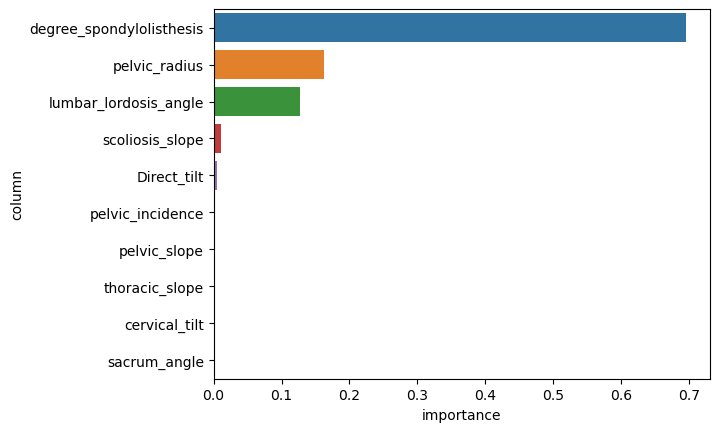

In [58]:
sns.barplot(x='importance',y='column',data=df_imp)

- As per Decision tree col 6,5,10 are best features. It supports observation of Logit model.
- col 3, 4,1 has moderate importance.
- Col5 less the pelvic tilt more probability for abnormality
- more the Spondilithiasis more chance for abnormal class
- Cervical tilt will impact backpain.
- Visualize values by tree plot.

# The data is imbalanced.

In [59]:
y_train.value_counts()

1    141
0     76
Name: Status, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train,y_train = smt.fit_resample(X_train_scaled,y_train)

In [61]:
y_train.value_counts()

0    141
1    141
Name: Status, dtype: int64

### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
